--- Dữ liệu với các cột MA và LR (7 dòng đầu) ---
   Week_number  Total_Revenue     MA_3_weeks  MA_5_weeks  LR_Prediction
0            1          64719            NaN         NaN  138680.928882
1            2         171811            NaN         NaN  139314.099846
2            3         276510  171013.333333         NaN  139947.270810
3            4          75208  174509.666667         NaN  140580.441774
4            5          78011  143243.000000    133251.8  141213.612738
5            6          47104   66774.333333    129728.8  141846.783702
6            7         176513  100542.666667    130669.2  142479.954666

Đã lưu dữ liệu mới vào file: weekly_revenue_with_ma_lr.csv
Đã lưu biểu đồ so sánh vào file: revenue_ma_lr_comparison.png


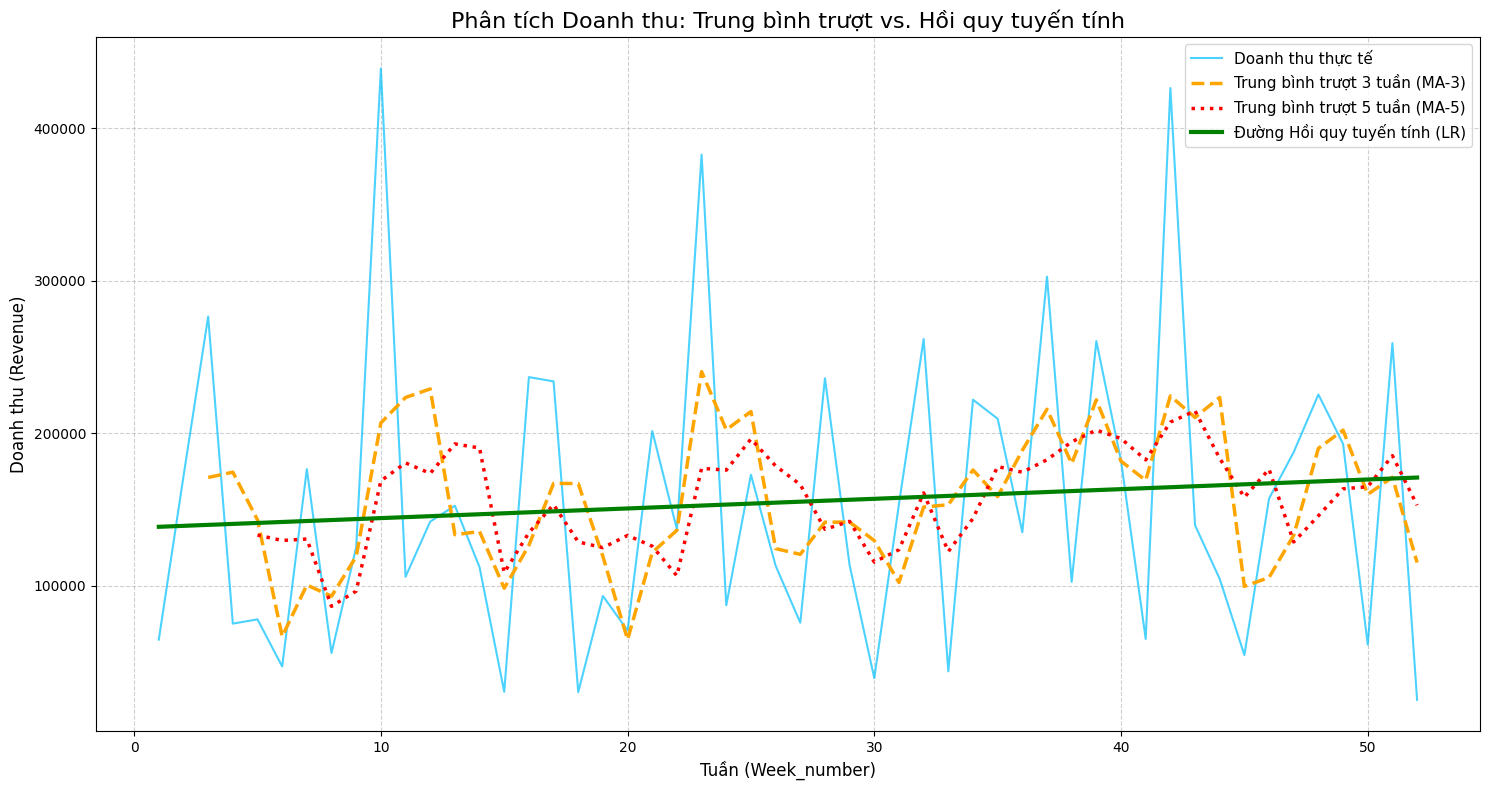

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# --- BƯỚC 1: Đọc và chuẩn bị dữ liệu ---

# Tải file dữ liệu CSV của bạn
df = pd.read_excel(r"/workspaces/Group6-Project-Python4DS-DSEB-66B/notebooks/week2/week2/Weekly_pivot_with_quarter_season.xlsx")

# --- BƯỚC 2: Tính toán các cột mới ---

# Công đoạn 1: Tạo cột Doanh thu Tổng
# Liệt kê các cột doanh thu sản phẩm
product_columns = ['Product_0979', 'Product_0993', 'Product_1157', 'Product_1159', 'Product_1938']
# Tính tổng doanh thu
df['Total_Revenue'] = df[product_columns].sum(axis=1)

# Công đoạn 2: Tính toán Trung bình trượt (MA)
window_3 = 3  # Cửa sổ 3 tuần
window_5 = 5  # Cửa sổ 5 tuần

# Sử dụng .rolling().mean()
df['MA_3_weeks'] = df['Total_Revenue'].rolling(window=window_3).mean()
df['MA_5_weeks'] = df['Total_Revenue'].rolling(window=window_5).mean()

# Công đoạn 3: Tái tạo mô hình Hồi quy Tuyến tính (LR)
# Chuẩn bị dữ liệu cho LR (X là biến độc lập, y là biến phụ thuộc)
X = df[['Week_number']] # Cần 2 dấu ngoặc vuông để tạo DataFrame 2D
y = df['Total_Revenue']  

# Xây dựng và huấn luyện (fit) mô hình
model_lr = LinearRegression()
model_lr.fit(X, y)

# Tạo cột dự đoán từ mô hình LR
df['LR_Prediction'] = model_lr.predict(X)

# --- BƯỚC 3: Kiểm tra và Lưu kết quả ---

# In ra 7 dòng đầu tiên để xem kết quả (bao gồm cả giá trị NaN)
print("--- Dữ liệu với các cột MA và LR (7 dòng đầu) ---")
print(df[['Week_number', 'Total_Revenue', 'MA_3_weeks', 'MA_5_weeks', 'LR_Prediction']].head(7))

# Lưu DataFrame mới ra file CSV để nhóm của bạn sử dụng
output_csv_file = 'weekly_revenue_with_ma_lr.csv'
df.to_csv(output_csv_file, index=False)
print(f"\nĐã lưu dữ liệu mới vào file: {output_csv_file}")

# --- BƯỚC 4: Trực quan hóa ---

# Công đoạn 4: Vẽ biểu đồ so sánh
plt.figure(figsize=(15, 8)) # Tạo khung hình (figure) với kích thước lớn

# 1. Vẽ doanh thu thực tế (màu xanh dương)
plt.plot(df['Week_number'], df['Total_Revenue'], label='Doanh thu thực tế', color='deepskyblue', alpha=0.7)

# 2. Vẽ MA 3 tuần (màu cam, nét đứt)
plt.plot(df['Week_number'], df['MA_3_weeks'], label='Trung bình trượt 3 tuần (MA-3)', color='orange', linestyle='--', linewidth=2.5)

# 3. Vẽ MA 5 tuần (màu đỏ, nét chấm)
plt.plot(df['Week_number'], df['MA_5_weeks'], label='Trung bình trượt 5 tuần (MA-5)', color='red', linestyle=':', linewidth=2.5)

# 4. Vẽ đường Hồi quy Tuyến tính (màu xanh lá)
plt.plot(df['Week_number'], df['LR_Prediction'], label='Đường Hồi quy tuyến tính (LR)', color='green', linewidth=3)

# --- Tùy chỉnh biểu đồ cho đẹp ---
plt.title('Phân tích Doanh thu: Trung bình trượt vs. Hồi quy tuyến tính', fontsize=16)
plt.xlabel('Tuần (Week_number)', fontsize=12)
plt.ylabel('Doanh thu (Revenue)', fontsize=12)
plt.legend(fontsize=11) # Hiển thị chú thích
plt.grid(True, linestyle='--', alpha=0.6) # Bật lưới (grid) mờ
plt.tight_layout() # Tự động căn chỉnh các thành phần

# Lưu biểu đồ ra file ảnh
output_plot_file = 'revenue_ma_lr_comparison.png'
plt.savefig(output_plot_file)

print(f"Đã lưu biểu đồ so sánh vào file: {output_plot_file}")